In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

print ('%d rows and %d columns' % (data.shape[0],data.shape[1]))
print (np.unique(data[len(data.columns)-1]))
data.head()

452 rows and 280 columns
[ 1  2  3  4  5  6  7  8  9 10 14 15 16]


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [2]:
# convert to binary(1==0, o.w==1)
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data.arrhythmia.value_counts()

0    245
1    207
Name: arrhythmia, dtype: int64

In [3]:
data = data._get_numeric_data()
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

452 rows and 276 columns


In [4]:
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
print(np.unique(y))

[0 1]


In [5]:
# splitting the dataset to training and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20171012)


In [6]:
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Accuracy: 0.85
AUC: 0.88


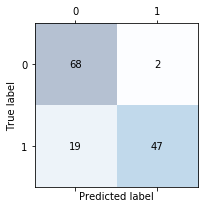

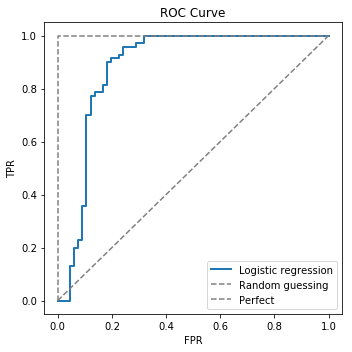

In [7]:
### Evaluation Metrics for Binary Classifiers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('./output/fig-logistic-regression-confusion-2.png', dpi=300)

### Receiver Operating Characteristic (ROC) Curve

from sklearn.metrics import roc_curve
from scipy import interp
from cycler import cycler

lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)

fig = plt.figure(figsize=(5, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

probas = lr.predict_proba(X_test_std)

fpr, tpr, thresholds = roc_curve(y_test, probas[:, 0], pos_label=0)

plt.plot(fpr, tpr, lw=2, label='Logistic regression')
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')

plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='gray',label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

plt.legend(loc="lower right")
plt.tight_layout()
#plt.savefig('./output/fig-roc-lg.png', dpi=300)

### area below

from sklearn.metrics import auc

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('AUC: %.2f' % auc(fpr, tpr))
plt.show()


Accuracy: 0.83
AUC: 0.92


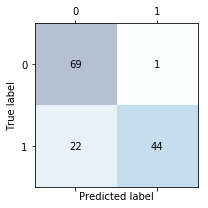

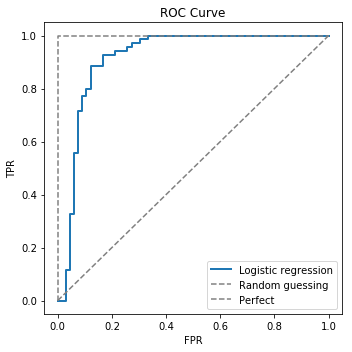

In [9]:
lr = LogisticRegression(C=0.07, random_state=0,
                        class_weight={0:245/452,1:207/452})
lr.fit(X_train_std, y_train)

### Evaluation Metrics for Binary Classifiers

y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('./CM_Lab06_105024519.png', dpi=300)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

### Receiver Operating Characteristic (ROC) Curve

fig = plt.figure(figsize=(5, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

probas = lr.predict_proba(X_test_std)

fpr, tpr, thresholds = roc_curve(y_test, probas[:, 0], pos_label=0)

plt.plot(fpr, tpr, lw=2, label='Logistic regression')
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')

plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='gray',label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('./ROC_Lab06_105024519.png', dpi=300)

### area below

print('AUC: %.2f' % auc(fpr, tpr))
plt.show()


> 因為將Regularization term調小，加上label個數的不平衡，導致調整後的模型傾向預測資料為0。這使正確率下降，也讓TPR和FPR上升，也使AUC增加。